# moviesLens

### 加载数据 users.dat, ratings.dat, movies.dat

In [21]:
import pandas as pd
from pandas import Series, DataFrame
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('./data/chapt2/MovieLens/users.dat', sep='::', header=None, names=unames, engine='python')
# users = pd.read_table('./data/chapt2/MovieLens/users.dat')
# print(users.head())

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./data/chapt2/MovieLens/ratings.dat', sep='::', header=None, names=rnames, engine='python')
# print(ratings.head())

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('./data/chapt2/MovieLens/movies.dat', sep='::', header=None, names=mnames, engine='python')
# print(ratings.head())

In [36]:
users[:5]
# 查询数据分布，元组数，最值，四分位数等
users.describe()
# 显示数据信息，每个属性的空值数，字段类型
users.info()

ratings.info()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip           6040 non-null object
dtypes: int64(3), object(2)
memory usage: 188.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 60.7+ KB


### 合并ratings、users和movies表--Merge

In [38]:
data = pd.merge(pd.merge(ratings, users), movies)
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


### 按性别计算每部电影的平均得分

In [51]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


### 将评论数小于250条的数据过滤掉

In [50]:
ratings_by_title = data.groupby(by='title').size()
ratings_by_title[:5]
active_title = ratings_by_title.index[ratings_by_title>250]
active_title

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1214)

### active_title结合上面的mean_dating可以选出女性最喜欢的电影

In [69]:
mean_ratings = mean_ratings.loc[active_title]
# mean_ratings
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### 计算男女评分分歧

In [76]:
mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']
# 评分分歧最大且女性最喜欢看的电影，反之，则是评分分歧最大且男性最喜欢看的电影
mean_ratings.sort_values(by='diff', ascending=False)[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Grease (1978),3.975265,3.367041,0.608224
Little Women (1994),3.870588,3.321739,0.548849
Steel Magnolias (1989),3.901734,3.365957,0.535777
Anastasia (1997),3.800000,3.281609,0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885
"Color Purple, The (1985)",4.158192,3.659341,0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,0.487561


### 找到分歧最大的电影（不考虑性别因素）

In [82]:
# 根据电影名称分组的得分数据的标准差
rating_std_by_title = data.groupby(by='title')['rating'].std()
# 根据active_titles过滤
rating_std_by_title = rating_std_by_title.loc[active_title]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# 1880-2010间全美婴儿姓名

### 组合数据--combat

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

years = range(1880, 2010)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = './data/chapt2/names/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)
names[:100]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


### 统计每年男女婴儿的总数

In [3]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


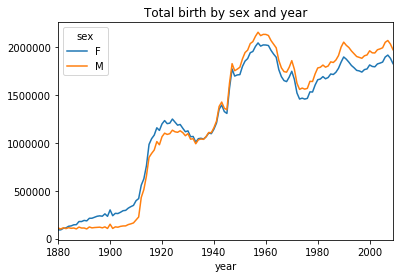

In [4]:
total_births.plot(title='Total birth by sex and year')

In [9]:
# 插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例
# prop=0.02表示每100名婴儿中有2名取了当前的名字
# 先按year和sex分组，然后再将新列加到各个分组上
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [15]:
def get_top1000(group):
    return group.sort_values('births', ascending = False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.info()
top1000

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 259877 entries, (1880, F, 0) to (2009, M, 1643467)
Data columns (total 5 columns):
name      259877 non-null object
sex       259877 non-null object
births    259877 non-null int64
year      259877 non-null int64
prop      259877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 11.6+ MB


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2009 M   1643437      Juelz   M     205  2009  0.000104
         1643440      Jamel   M     204  2009  0.000103
         1643441     Jaycob   M     204  2009  0.000103
         1643439   Geovanni   M     204  2009  0.000103
         1643438      Anton   M     204  2009  0.000103
         1643443   Jerimiah   M     203  2009  0.000103
         1643444      Kalel   M     203  2009  0.000103
         1643445       Mack   M     203  2009  0.000103
         1643446     Maddux   M     203  2009  0.000103
         1643442     Blaise   M     203  2009  0.000103
         1643447       Odin   M     202  2009  0.000102
         1643448     Stefan   M     202  2009  0.000102
         1643449     Deegan   M     201  2009  0.000102
         1643450    Eliezer   M     201  2009  0.000102
         1643451   Leonidas   M     201  2009  0.000102
         1643452       Cain   M     200  2009  0.000101
         1643453     Denzel   M     200  2009  0.000101
         1643456     Zavion   M     199  2009  0.000101
         1643454       Hugh   M     199  2009  0.000101
         1643455       Zaid   M     199  2009  0.000101
         1643457     Antony   M     198  2009  0.000100
         1643458       Chaz   M     197  2009  0.000100
         1643459   Fredrick   M     197  2009  0.000100
         1643460   Menachem   M     197  2009  0.000100
         1643461       Nick   M     197  2009  0.000100
         1643462      Stone   M     197  2009  0.000100
         1643463     Trevin   M     197  2009  0.000100
         1643464    Tyshawn   M     197  2009  0.000100
         1643468    Ronaldo   M     196  2009  0.000099
         1643467    Mustafa   M     196  2009  0.000099

[259877 rows x 5 columns]

### 分析命名趋势

In [17]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [18]:
total_births = top1000.pivot_table('births', index='year', columns='name',aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,...,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,71.0,NaN,...,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,81.0,NaN,...,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,80.0,NaN,...,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,79.0,NaN,...,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,98.0,NaN,...,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0
1885,NaN,NaN,NaN,88.0,6.0,NaN,NaN,NaN,88.0,NaN,...,NaN,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,84.0,NaN,...,NaN,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,104.0,NaN,...,11.0,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,137.0,NaN,...,NaN,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x04804770>,
      dtype=object)

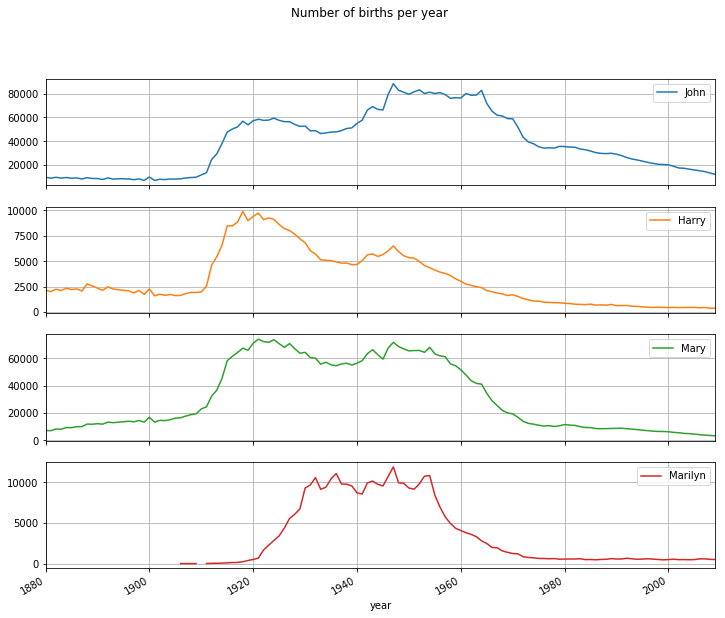

In [20]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=True, title='Number of births per year')